In [ ]:
%load_ext autoreload
%autoreload 2
from IPython.display import display, clear_output
import pandas as pd
# pd.options.mode.chained_assignment = None
import numpy as np
import pickle
import fui. as boersen
import importlib
import time
importlib.reload(boersen)

process_data = False

if process_data:
    df = boersen.load_raw_data()
    print('Parallelized, {} articles'.format(df.shape[0]))
    start_time = time.time()
    df['body'] = boersen.process_text(df['ArticleContents'])
    df['afinn'], df['bloom'] = boersen.enrich_text(df['body'])
    df['word_count'] = df['body'].str.split().str.len()
    df['afinn_norm'] = 100*df['afinn']/(df['word_count'])
    print(boersen.f_writetime(time.time() - start_time))
    with open('data/scored.pkl', 'wb') as file:
        pickle.dump(df, file)

else:
    with open('data/scored.pkl', 'rb') as file:
        df = pickle.load(file)

df = df[['ID', 'Title', 'body', 'ArticleDateCreated', 'ShowOnWebSite', 'Author', 'Supplier', 'SectionWebSite', 'SectionName',
         'afinn', 'bloom', 'afinn_norm', 'word_count']]
df['ArticleDateCreated'] = pd.to_datetime(df['ArticleDateCreated'])
# df = df.sample(10000)
df.head()

## A financial index from newspaper articles

We can then aggregate the sentiment of articles published in Børsen from 1996 until today in a weekly index, and compare it to GDP growth in the quarter. The adopted smoothing is a running moving average of the weekly observations in the running quarter, i.e.

$$
\bar{i}_{t} = \frac{1}{N}\sum_{n=0}^{N}i_{t-n}
$$

where for a weekly index $N$ is set to default to 15. This parameter can be regulated by passing `smoothing=N` to `boersen.plot_index()`

In [ ]:
selection = (df['word_count']>100) & (df['Supplier'].isin(['Børsen', 'E-avis']))
df = df[selection]
df = df[df['ArticleDateCreated'].dt.year>=1999]

In [ ]:
split = [True, False]


In [ ]:
basis = [True]*df.shape[0] #df['afinn_norm']!=0
# print(sum(basis)/df.shape[0])
n_articles = df[basis].shape[0]
selection = df[basis]['body'].str.contains('økon|finan|industri', regex=True)
print(100*df[basis & selection].shape[0]/n_articles)

fig, ax, index = boersen.plot_index(df[basis], 'afinn_norm', plot_gdp=True, split = selection, frequency='M', smoothing=3, export_index=True)
plt.show()

name = 'ofi_diff'
# fig.savefig('temp/{}.png'.format(name), dpi=500, tight_layout=True, bbox_inches='tight')
index.rename(columns={'afinn_norm': name}).to_csv('temp/{}.csv'.format(name))

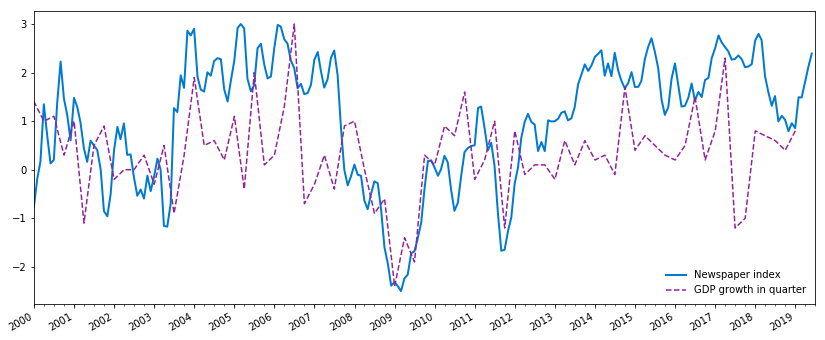

In [113]:
importlib.reload(boersen)
import matplotlib.pyplot as plt
boersen.define_NB_colors()

selection = df[basis]['body'].str.contains('økon|finan|industri', regex=True)

fig, ax, index = boersen.plot_index(df[selection], 'afinn_norm', plot_gdp=True, refactor=True, frequency='M', smoothing=3, export_index=True)
plt.show()

name = 'ofi_abs'
fig.savefig('temp/{}.png'.format(name), dpi=500, tight_layout=True, bbox_inches='tight')
index.rename(columns={'afinn_norm': name}).to_csv('temp/{}.csv'.format(name))

In [13]:
gdp = pd.read_csv('data/gdp3.csv', usecols=[2,3], names=['quarter', 'growth'])
gdp['quarter'] = pd.to_datetime(gdp['quarter'].str.replace('K', 'Q')) + pd.DateOffset(months=3)

gdp

,quarter,growth
0,1996-04-01,0.0
1,1996-07-01,2.7
2,1996-10-01,0.3
3,1997-01-01,0.0
4,1997-04-01,1.3
5,1997-07-01,1.7
6,1997-10-01,-0.3
7,1998-01-01,0.0
8,1998-04-01,1.5
9,1998-07-01,-0.8


,date,afinn_norm
0,1997-05-31,-0.130391
1,1997-06-30,1.706846
2,1997-07-31,1.091640
3,1997-08-31,1.071047
4,1997-09-30,0.747662


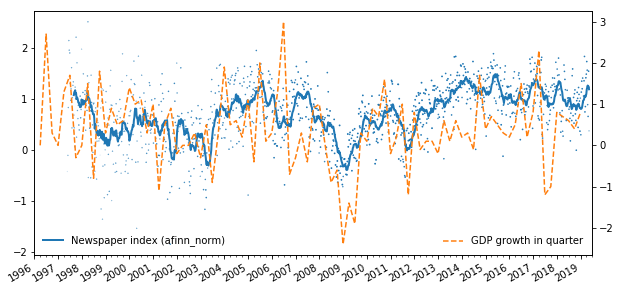

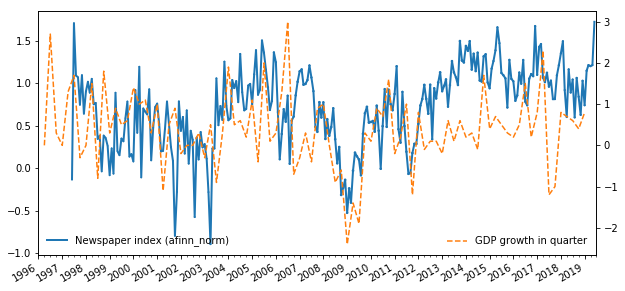

In [11]:
importlib.reload(boersen)
import pickle
fig, ax, _index = boersen.plot_index(
    df, 'afinn_norm', plot_gdp=True, selection = ['Børsen'],
    export_index=True)
with open('afinn_W.pkl', 'wb') as file:
    pickle.dump(_index, file)
    
fig, ax, _index = boersen.plot_index(
    df, 'afinn_norm', plot_gdp=True, selection = ['Børsen'],
    export_index=True, smoothing=1, frequency='M')
with open('afinn_M.pkl', 'wb') as file:
    pickle.dump(_index, file)
    
_index.head()

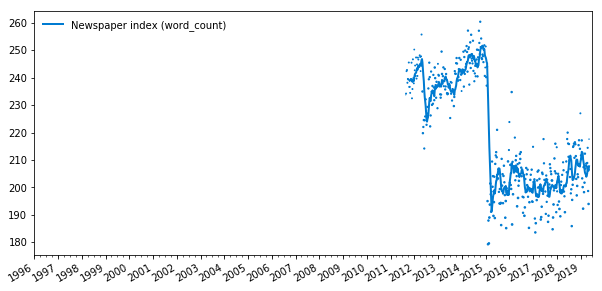

In [280]:
importlib.reload(boersen)
fig, ax = boersen.plot_index(df, 'word_count', plot_gdp=False, index_label_position=0, selection=['Ritzau'])

In [268]:
# import pickle
# with open('scored.pkl', 'wb') as file:
#     pickle.dump(df, file)
# df.head()
# importlib.reload(boersen)
# boersen.print_meta_data('Nan1')
# gdp = boersen.load_data_dst('Nan1', varlist, unitlist, timelist)
